# Sensitivity/Specificity

In [1]:
spec <- seq(0.5, 1, length=100) # sensitivity
sens <- seq(0.5, 1, length=100) # specificity
prev <- seq(0.1, 0.9, 0.1) # population prevalence

In [2]:
grid <- expand.grid(spec=spec,
                    sens=sens,
                    prev=prev)

In [3]:
# positive predictive value as function of sens, spec, and prevalence
grid$ppv <- (grid$sens * grid$prev) / ( (grid$sens * grid$prev) + (1 - grid$spec) * (1 - grid$prev) )

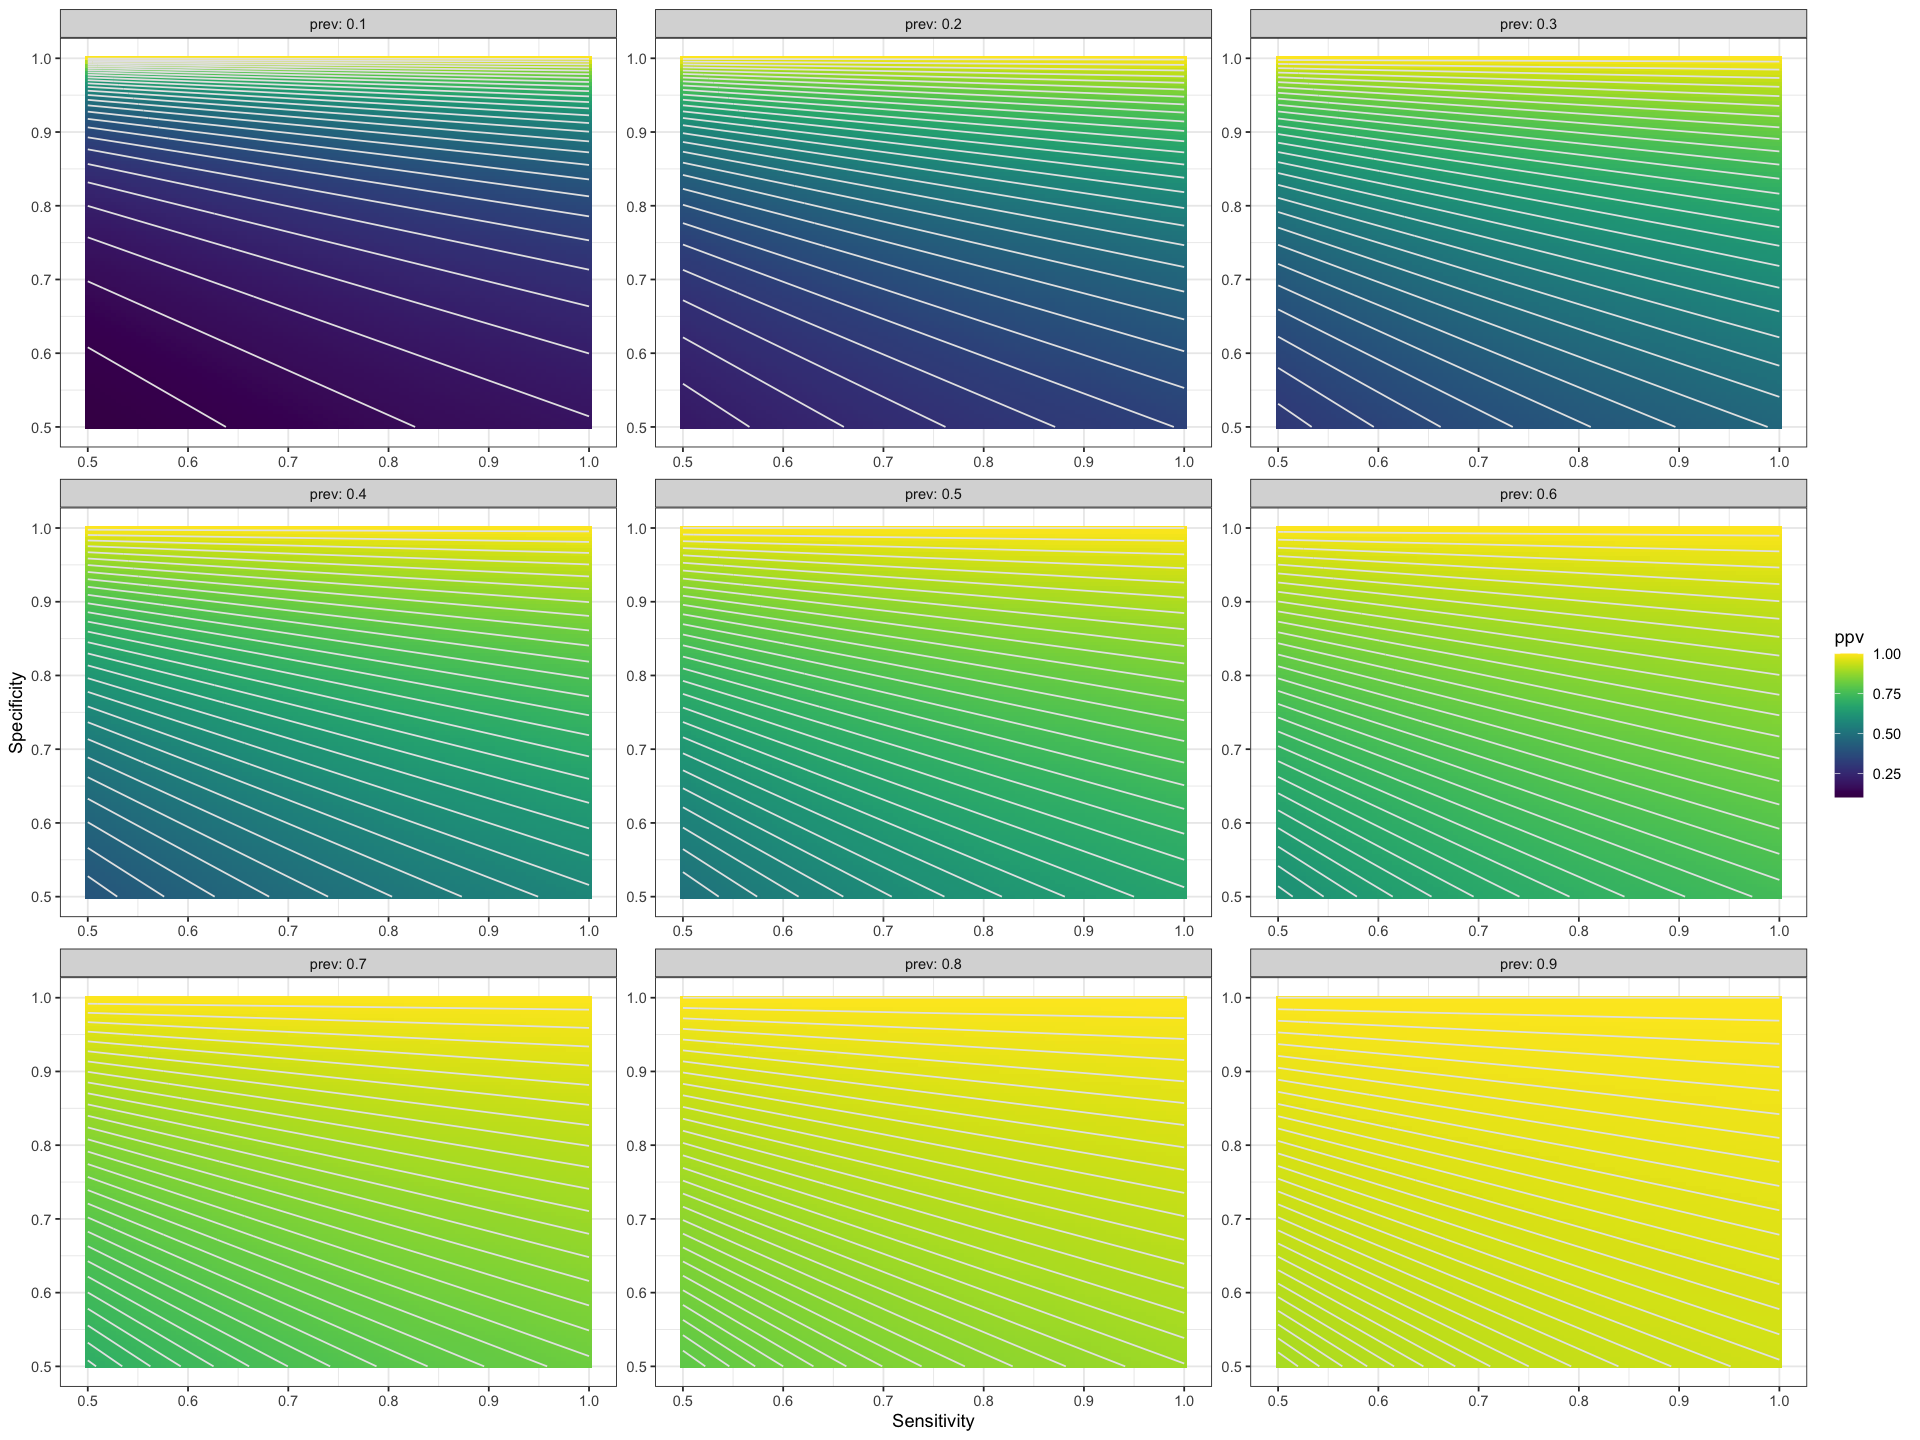

In [5]:
# libraries
library(ggplot2)
library(ggthemes)
library(viridis)

# options
options(repr.plot.width=16, repr.plot.height=12)

# Contour plot of positive predictive value by sensitivity and specificity
p <- ggplot(grid, aes(x = sens, y = spec, z = ppv))
p <- p + theme_bw() + scale_fill_viridis()
# p <- p + stat_contour(geom = 'polygon', aes(fill = ppv))
p <- p + geom_tile(aes(fill = ppv))
p <- p + stat_contour(bins = 30, col='grey90')
p <- p + xlab('Sensitivity') + ylab('Specificity')
p <- p + facet_wrap(. ~ prev, labeller=label_both, ncol=3, scales='free')
p